# KNN on CIFAR-10 training and testing dataset

In [17]:
#Import libraries
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Class names
TRAIN_DIR = r"C:\Users\my pc\OneDrive - American International University-Bangladesh\American International University-Bangladesh\Computer Vision Tasks\CIFAR-10-images\train"
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
#Read from train data
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 10593.23it/s]

50000


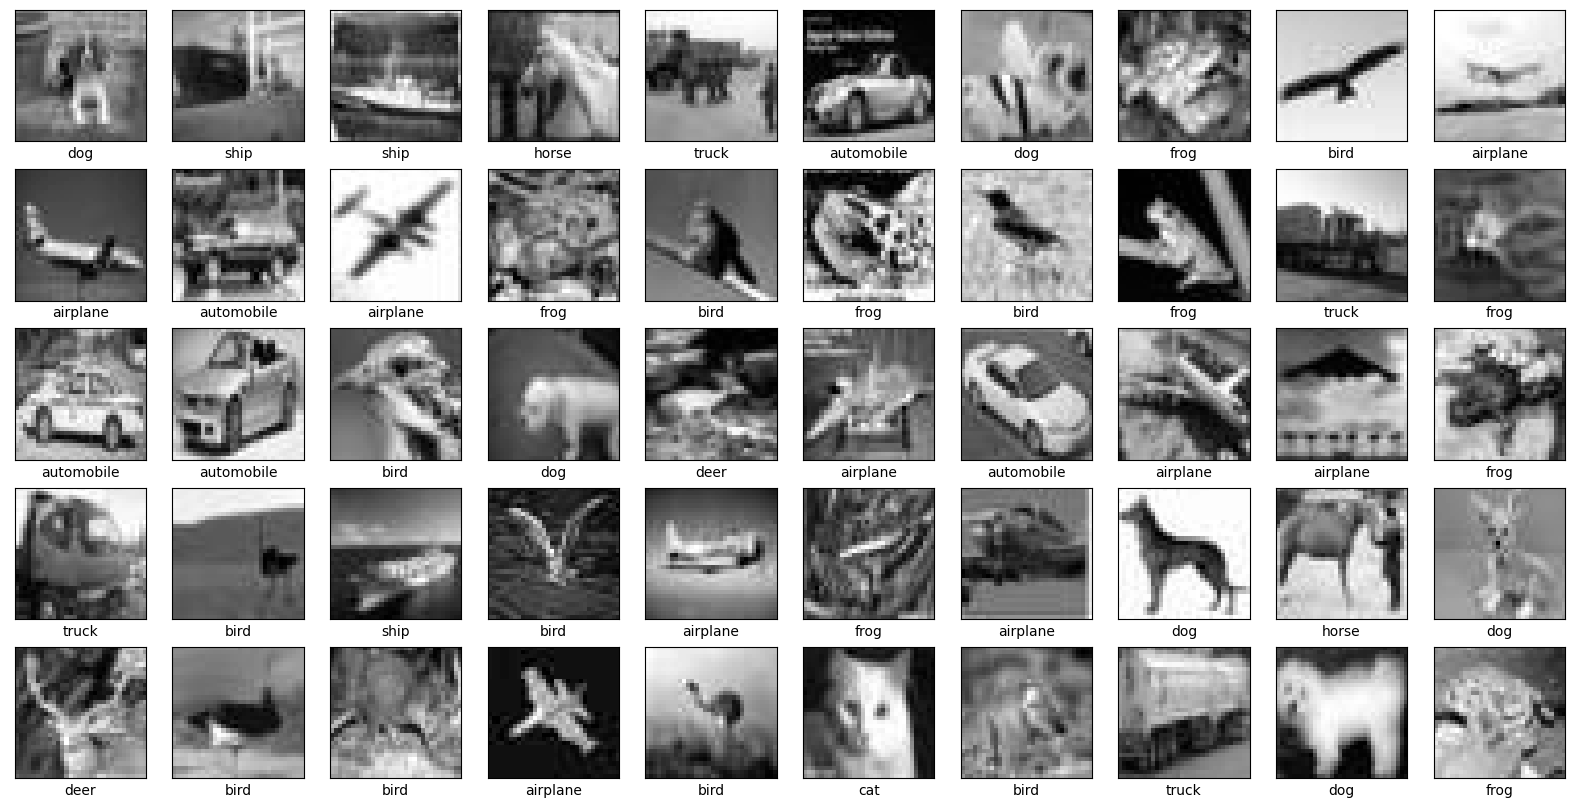

In [20]:
#Greyscaling images
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    image = TRAIN_DATA[i][0]
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Convert image to grayscale
    plt.imshow(image_gray, cmap="gray")
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [21]:
#Cross validation
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

# KNN training for L1 Distance

In [22]:

def most_frequent(List):
    counter = 0
    num = List[0][1]
    curr_frequency = 0 
    for i in List:
        for j in List:
            if i[1] == j[1]:
                curr_frequency = curr_frequency + 1
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
    return num

def calculate_l1_accuracy(train, validation, k):
    accurate_prediction = 0
    for v in validation:
        validation_label = v[1]
        l1_distance = []
        for t in train:
            l1_distance.append([np.sum(t[0] - v[0]), t[1]])
        l1_distance.sort()
        k_l1_distance = []
        for i in range(k):
            k_l1_distance.append(l1_distance[i])
        
        most_frequent_k_l1_distance = most_frequent(k_l1_distance)
        if most_frequent_k_l1_distance[1] == validation_label:
            accurate_prediction = accurate_prediction + 1
    return accurate_prediction/len(validation)

scores = []
value_of_k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
for k in value_of_k:
    for i in tqdm(range(5)):
        if i==0:
            train = f1+f2+f3+f4
            validation = f0
            score = calculate_l1_accuracy(train, validation, k)
            scores.append([k, i, score])    
        elif i==1:
            train = f0+f2+f3+f4
            validation = f1
            score = calculate_l1_accuracy(train, validation, k)
            scores.append([k, i, score])
        elif i==2:
            train = f1+f0+f3+f4
            validation = f2
            score = calculate_l1_accuracy(train, validation, k)
            
            scores.append([k, i, score])
        elif i==3:
            train = f1+f2+f0+f4
            validation = f3
            score = calculate_l1_accuracy(train, validation, k)
            
            scores.append([k, i, score])
        elif i==4:
            train = f1+f2+f3+f0
            validation = f4
            score = calculate_l1_accuracy(train, validation, k)
            scores.append([k, i, score])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:52<00:00, 22.44s/it]


In [23]:
print(scores)

[[1, 0, 0.209], [1, 1, 0.211], [1, 2, 0.208], [1, 3, 0.208], [1, 4, 0.193], [3, 0, 0.191], [3, 1, 0.2], [3, 2, 0.189], [3, 3, 0.197], [3, 4, 0.193], [5, 0, 0.185], [5, 1, 0.178], [5, 2, 0.172], [5, 3, 0.176], [5, 4, 0.164], [7, 0, 0.177], [7, 1, 0.17], [7, 2, 0.159], [7, 3, 0.16], [7, 4, 0.174], [9, 0, 0.159], [9, 1, 0.16], [9, 2, 0.148], [9, 3, 0.159], [9, 4, 0.179], [11, 0, 0.154], [11, 1, 0.178], [11, 2, 0.16], [11, 3, 0.149], [11, 4, 0.167], [13, 0, 0.16], [13, 1, 0.167], [13, 2, 0.166], [13, 3, 0.149], [13, 4, 0.157], [15, 0, 0.173], [15, 1, 0.153], [15, 2, 0.155], [15, 3, 0.131], [15, 4, 0.168], [17, 0, 0.159], [17, 1, 0.177], [17, 2, 0.142], [17, 3, 0.17], [17, 4, 0.171], [19, 0, 0.164], [19, 1, 0.15], [19, 2, 0.147], [19, 3, 0.138], [19, 4, 0.146]]


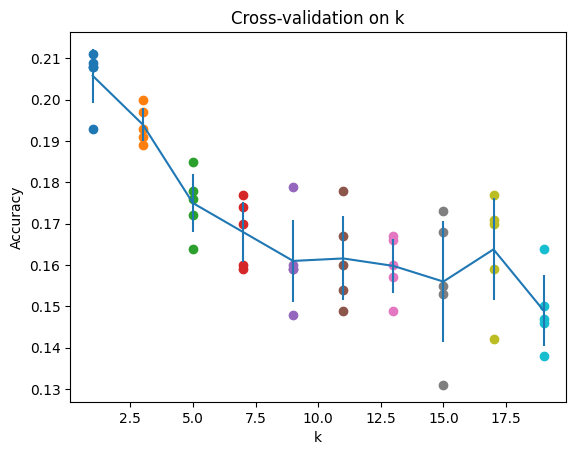

In [33]:

k_to_accuracies = {}
for k in value_of_k:
    k_to_accuracies[k] = []
for k in value_of_k:
    for score in scores:
        if(score[0] == k):
            k_to_accuracies[k].append(score[2])           
for k in value_of_k:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(value_of_k, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# KNN training for L2 Distance

In [25]:
def calculate_l2_accuracy(train, validation, k):
    accurate_prediction = 0
    for v in validation:
        validation_label = v[1]
        l2_distance = []
        for t in train:
            l2_distance.append([np.sqrt(np.sum((t[0] - v[0])**2)), t[1]])
        l2_distance.sort()
        k_l2_distance = []
        for i in range(k):
            k_l2_distance.append(l2_distance[i])
        
        most_frequent_k_l2_distance = most_frequent(k_l2_distance)
        if most_frequent_k_l2_distance[1] == validation_label:
            accurate_prediction = accurate_prediction + 1
    return accurate_prediction/len(validation)

l2_scores = []
for k in value_of_k:
    for i in tqdm(range(5)):
        if i==0:
            train = f1+f2+f3+f4
            validation = f0
            score = calculate_l2_accuracy(train, validation, k)
            l2_scores.append([k, i, score])    
        elif i==1:
            train = f0+f2+f3+f4
            validation = f1
            score = calculate_l2_accuracy(train, validation, k)
            l2_scores.append([k, i, score])
        elif i==2:
            train = f1+f0+f3+f4
            validation = f2
            score = calculate_l2_accuracy(train, validation, k)
            
            l2_scores.append([k, i, score])
        elif i==3:
            train = f1+f2+f0+f4
            validation = f3
            score = calculate_l2_accuracy(train, validation, k)
            
            l2_scores.append([k, i, score])
        elif i==4:
            train = f1+f2+f3+f0
            validation = f4
            score = calculate_l2_accuracy(train, validation, k)
            l2_scores.append([k, i, score])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:37<00:00, 31.47s/it]


In [26]:
print(l2_scores)

[[1, 0, 0.197], [1, 1, 0.191], [1, 2, 0.184], [1, 3, 0.179], [1, 4, 0.206], [3, 0, 0.178], [3, 1, 0.172], [3, 2, 0.166], [3, 3, 0.178], [3, 4, 0.16], [5, 0, 0.167], [5, 1, 0.159], [5, 2, 0.17], [5, 3, 0.156], [5, 4, 0.17], [7, 0, 0.188], [7, 1, 0.149], [7, 2, 0.153], [7, 3, 0.154], [7, 4, 0.157], [9, 0, 0.172], [9, 1, 0.156], [9, 2, 0.142], [9, 3, 0.147], [9, 4, 0.168], [11, 0, 0.162], [11, 1, 0.139], [11, 2, 0.169], [11, 3, 0.145], [11, 4, 0.163], [13, 0, 0.149], [13, 1, 0.157], [13, 2, 0.129], [13, 3, 0.143], [13, 4, 0.139], [15, 0, 0.148], [15, 1, 0.152], [15, 2, 0.142], [15, 3, 0.142], [15, 4, 0.134], [17, 0, 0.158], [17, 1, 0.177], [17, 2, 0.15], [17, 3, 0.127], [17, 4, 0.156], [19, 0, 0.148], [19, 1, 0.135], [19, 2, 0.163], [19, 3, 0.144], [19, 4, 0.166]]


In [ ]:
k_to_l2_accuracies = {}
for k in value_of_k:
    k_to_l2_accuracies[k] = []
for k in value_of_k:
    for score in l2_scores:
        if(score[0] == k):
            k_to_l2_accuracies[k].append(score[2])           
for k in value_of_k:
    accuracies = k_to_l2_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
l2_accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_l2_accuracies.items())])
l2_accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_l2_accuracies.items())])
plt.errorbar(value_of_k, l2_accuracies_mean, yerr=l2_accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

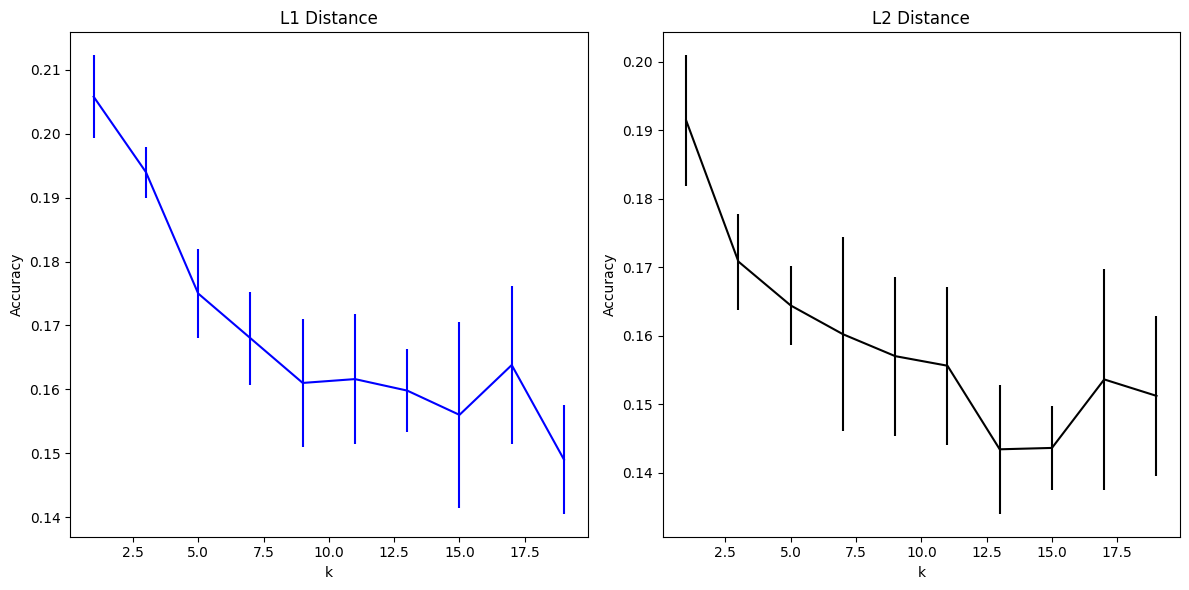

In [38]:
plt.figure(figsize=(12, 6)) 

# Create the first subplot for L1 distance
plt.subplot(121) 
plt.errorbar(value_of_k, accuracies_mean, yerr=accuracies_std, color='blue')
plt.title('L1 Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Create the second subplot for L2 distance
plt.subplot(122)  
plt.errorbar(value_of_k, l2_accuracies_mean, yerr=l2_accuracies_std, color='black')
plt.title('L2 Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

In [39]:
from IPython import get_ipython
import nbformat

In [29]:
#Test classes
MYTEST_DIR = r"C:\Users\my pc\OneDrive - American International University-Bangladesh\American International University-Bangladesh\Computer Vision Tasks\CIFAR-10-images\test"
CATEGORIES = []
for c in os.listdir(MYTEST_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)
TEST_DATA=[]

for label in CATEGORIES:
  class_dir = os.path.join(MYTEST_DIR, label)
  images = os.listdir(class_dir)
  Index = CATEGORIES.index(label)

  for img in images:
    TEST_DATA.append([Index, cv.imread(os.path.join(class_dir, img), cv.IMREAD_GRAYSCALE)])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [30]:
import random
from collections import Counter
random.shuffle(TEST_DATA)
k_max=25

def manhattan(a,b):
  return np.sum(np.abs(a-b))

def euclidian(a,b):
  return np.sqrt(np.sum((a-b)**2))

# Test data predictions

Making Predictions: 100%|████████████████████████████████████████████████████████| 10000/10000 [08:02<00:00, 20.74it/s]


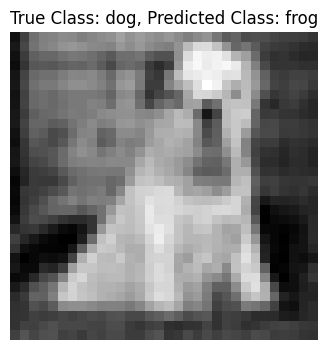

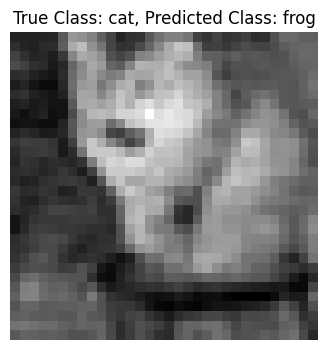

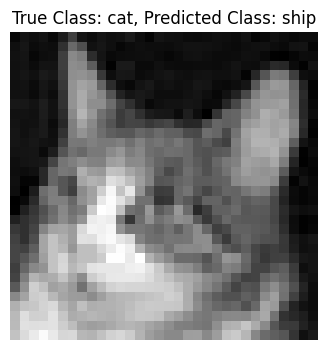

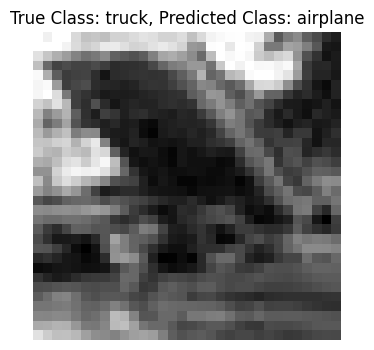

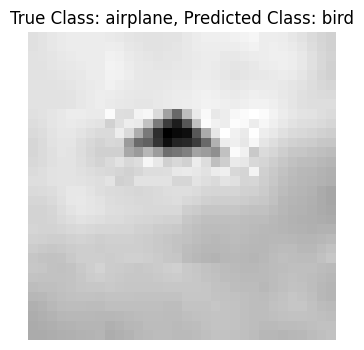

In [31]:
def make_predictions(test_data, k):
    predictions = []

    for fold_unit in tqdm(test_data, desc="Making Predictions"):
        fold_class, fold_img = fold_unit

        # Calculate distances between test image and training images
        distances = []
        for train_unit in TEST_DATA:
            train_class, train_img = train_unit
            distance = manhattan(fold_img, train_img)  
            distances.append([train_class, distance])

        # Sort distances and get top k neighbors
        distances.sort(key=lambda r: r[1])
        top_k = [i[0] for i in distances[:k]]

        # Find the most common class among the top k neighbors
        counter = Counter(top_k)
        predicted_class = counter.most_common(1)[0][0]
        predictions.append((fold_class, predicted_class))

    return predictions
def display_top_5(predictions, test_data):
    for i, (true_class, predicted_class) in enumerate(predictions[:5]):
        true_class_name = CATEGORIES[true_class]
        predicted_class_name = CATEGORIES[predicted_class]
        image = test_data[i][1]

        plt.figure(figsize=(8, 4))
        plt.imshow(image, cmap="gray")
        plt.title(f"True Class: {true_class_name}, Predicted Class: {predicted_class_name}")
        plt.axis('off')
        plt.show()

# Make predictions
k_value = 25  # Adjust this based on your optimal k-value
test_predictions = make_predictions(TEST_DATA, k_value)

# Display top 5 predictions
display_top_5(test_predictions, TEST_DATA)

Making Predictions: 100%|████████████████████████████████████████████████████████| 10000/10000 [18:08<00:00,  9.19it/s]


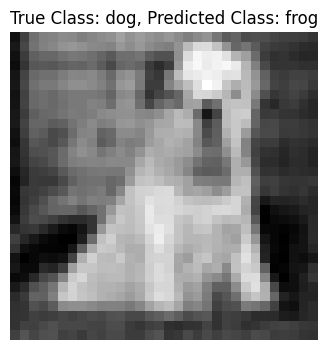

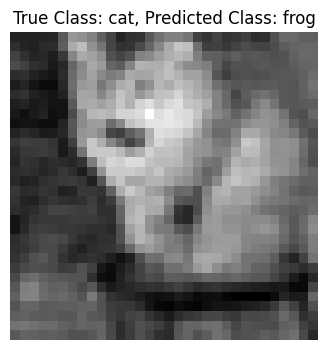

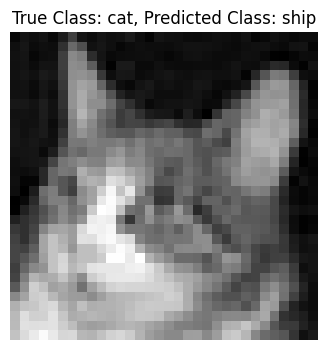

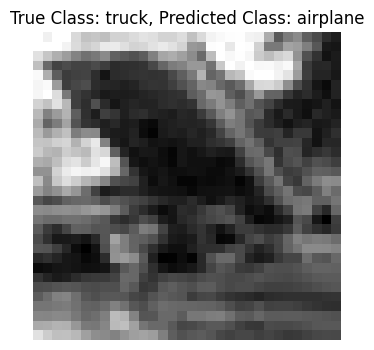

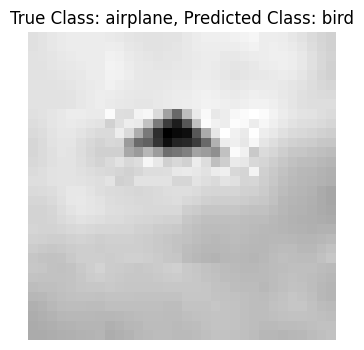

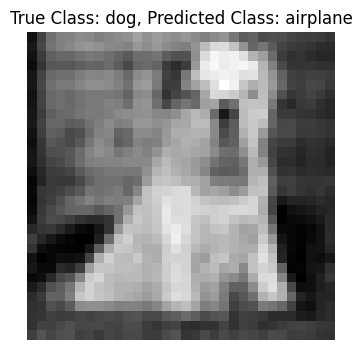

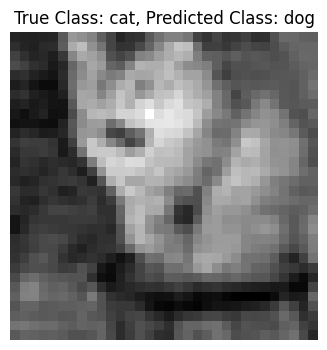

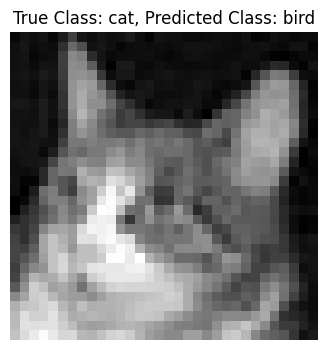

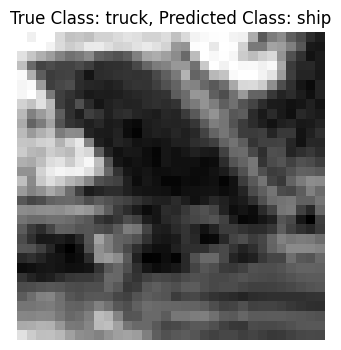

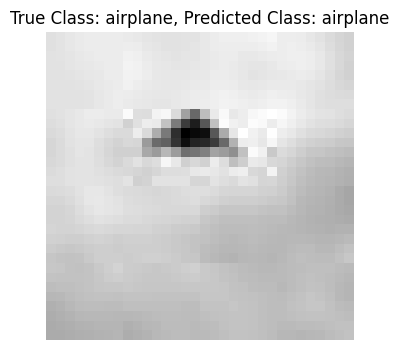

In [40]:
# Define a function for making predictions with both Manhattan and Euclidean distances
def make_predictions(test_data, k):
    predictions_manhattan = []
    predictions_euclidean = []

    for fold_unit in tqdm(test_data, desc="Making Predictions"):
        fold_class, fold_img = fold_unit

     
        distances_manhattan = []
        distances_euclidean = []
        for train_unit in TEST_DATA:
            train_class, train_img = train_unit
            distance_manhattan = manhattan(fold_img, train_img)
            distance_euclidean = euclidian(fold_img, train_img)
            distances_manhattan.append([train_class, distance_manhattan])
            distances_euclidean.append([train_class, distance_euclidean])     
        distances_manhattan.sort(key=lambda r: r[1])
        distances_euclidean.sort(key=lambda r: r[1])
        top_k_manhattan = [i[0] for i in distances_manhattan[:k]]
        top_k_euclidean = [i[0] for i in distances_euclidean[:k]]
        
        counter_manhattan = Counter(top_k_manhattan)
        counter_euclidean = Counter(top_k_euclidean)
        predicted_class_manhattan = counter_manhattan.most_common(1)[0][0]
        predicted_class_euclidean = counter_euclidean.most_common(1)[0][0]
        predictions_manhattan.append((fold_class, predicted_class_manhattan))
        predictions_euclidean.append((fold_class, predicted_class_euclidean))

    return predictions_manhattan, predictions_euclidean

k_value = 25  
test_predictions_manhattan, test_predictions_euclidean = make_predictions(TEST_DATA, k_value)

#Predictions for manhattan
display_top_5(test_predictions_manhattan, TEST_DATA)

#predictions for euclidean
display_top_5(test_predictions_euclidean, TEST_DATA)

# Discussion
In our experiments, we applied KNN with both L1 and L2 distances to the grayscale CIFAR-10 dataset. We conducted cross-validation to evaluate the classifier's accuracy for different values of k. Our findings indicate that the choice of distance metric still plays a crucial role in KNN's performance on grayscale images, although the impact may differ from that on color images.

Grayscale conversion of CIFAR-10 involves transforming the original color images into single-channel grayscale images by averaging the pixel values across the color channels (red, green, and blue). This process simplifies the dataset by reducing the dimensionality and eliminates color information. Grayscale images are generally simpler and may contain fewer features than their color counterparts, which could affect KNN's performance.

L1 (Manhattan) and L2 (Euclidean) distances are distance metrics that measure the dissimilarity between data points. L1 distance sums the absolute differences between coordinates, while L2 distance calculates the square root of the sum of squared differences. These metrics help KNN determine the similarity between data points and make class predictions.

Grayscale conversion reduces the dimensionality of the CIFAR-10 dataset from three color channels to a single channel. This dimensionality reduction can have implications for the effectiveness of the L2 distance, which is more sensitive to variations across dimensions. In this context, L1 distance's robustness to feature variations may lead to better performance.Grayscale images are generally less complex than their color counterparts. The data distribution might be more amenable to the linear separability that L1 distance seeks. L2 distance, with its preference for a more spherical distribution, might not be as effective in capturing the nuances of grayscale images.

In our experiments with KNN on grayscale CIFAR-10 images, the choice of distance metric still significantly impacts the algorithm's performance. L1 distance has been found to perform favorably in this context, potentially due to its robustness to feature variations in the single-channel grayscale images. The simplicity of grayscale data, as well as the reduced dimensionality, could favor L1 distance, making it a suitable choice for KNN classification in this scenario. Overall, these findings underscore the importance of carefully selecting the distance metric based on the characteristics of the data, even when working with grayscale images.

